In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("South_German_Credit_formatted.csv")

In [3]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [4]:
data.installment_rate.value_counts()

installment_rate
4    476
2    231
3    157
1    136
Name: count, dtype: int64

In [5]:
data.other_debtors.value_counts()


other_debtors
1    907
3     52
2     41
Name: count, dtype: int64

In [6]:
data.other_installment_plans.value_counts()

other_installment_plans
3    814
1    139
2     47
Name: count, dtype: int64

In [7]:
data.housing.value_counts()

housing
2    714
1    179
3    107
Name: count, dtype: int64

In [8]:
data.job.value_counts()

job
3    630
2    200
4    148
1     22
Name: count, dtype: int64

In [9]:
data.people_liable.value_counts()

people_liable
2    845
1    155
Name: count, dtype: int64

In [10]:
data.foreign_worker.value_counts()

foreign_worker
2    963
1     37
Name: count, dtype: int64

In [11]:
data.shape

(1000, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [13]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]

In [14]:
print('Number of Numerical Feature :', len(numerical_feature))

Number of Numerical Feature : 21


In [15]:
for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is status and number of categories are 4
The feature is duration and number of categories are 33
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is amount and number of categories are 923
The feature is savings and number of categories are 5
The feature is employment_duration and number of categories are 5
The feature is installment_rate and number of categories are 4
The feature is personal_status_sex and number of categories are 4
The feature is other_debtors and number of categories are 3
The feature is present_residence and number of categories are 4
The feature is property and number of categories are 4
The feature is age and number of categories are 53
The feature is other_installment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is number_credits and number of categories are 4
The feature is job and number of categories are 4
The fe

In [16]:
discrete_variable=[feature for feature in numerical_feature if len(data[feature].unique())<9]

In [17]:
print('Discrete Variable Feature : {}'.format(len(discrete_variable)))

Discrete Variable Feature : 17


In [18]:
print('Discrete Variable Feature : {}'.format(len(discrete_variable)))

Discrete Variable Feature : 17


In [19]:
continous_variable=[feature for feature in numerical_feature if feature not in data[discrete_variable]]

In [20]:
print('Continous Variable Feature : {}'.format(len(continous_variable)))

Continous Variable Feature : 4


In [21]:
print('Continous Variable Feature : {}'.format(len(continous_variable)))

Continous Variable Feature : 4


In [22]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<Axes: xlabel='credit_risk', ylabel='count'>

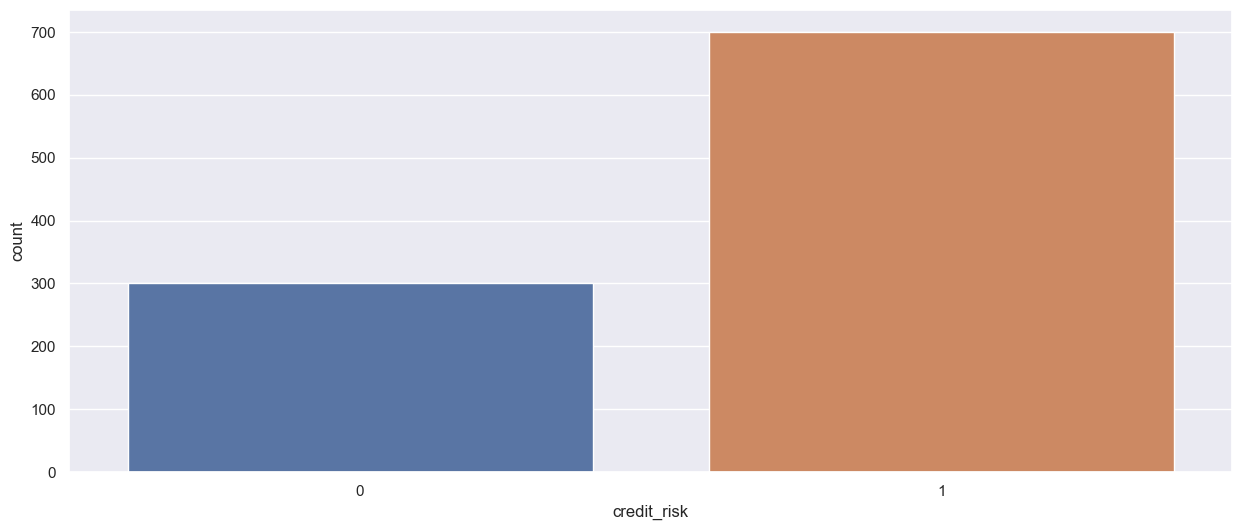

In [23]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',data=data)

<Axes: xlabel='foreign_worker', ylabel='count'>

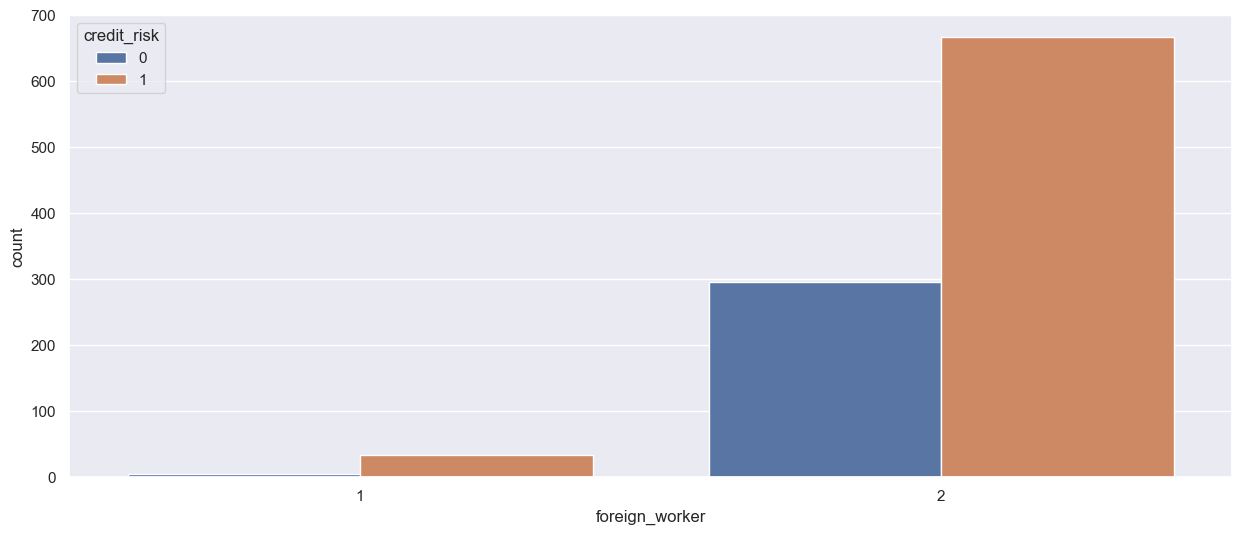

In [24]:
sns.set_theme(style='darkgrid')
sns.countplot(x='foreign_worker',hue='credit_risk',data=data)

<Axes: xlabel='credit_risk', ylabel='count'>

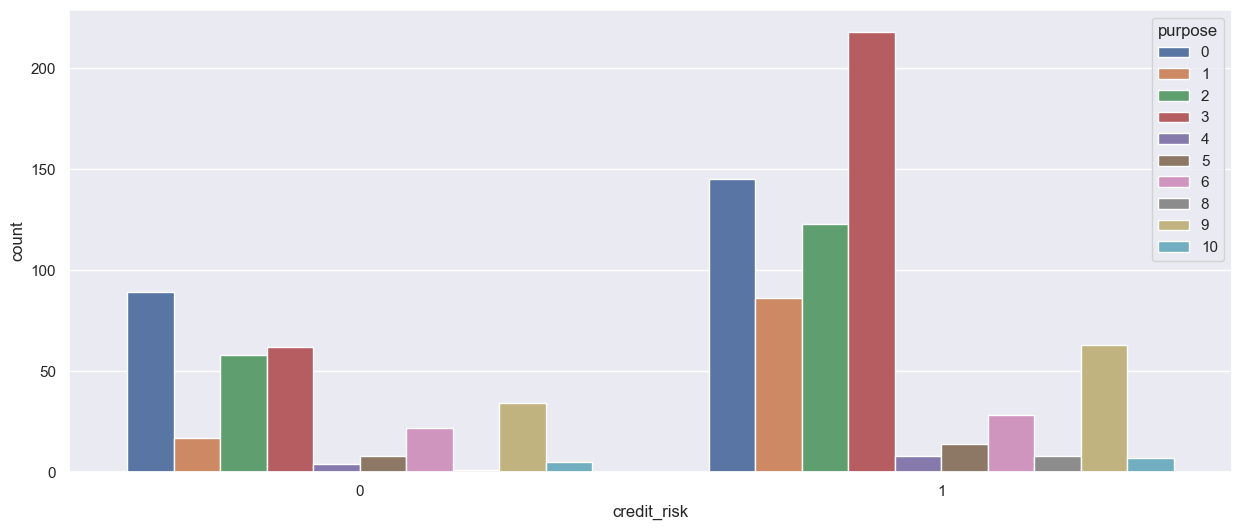

In [25]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',hue='purpose',data=data)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

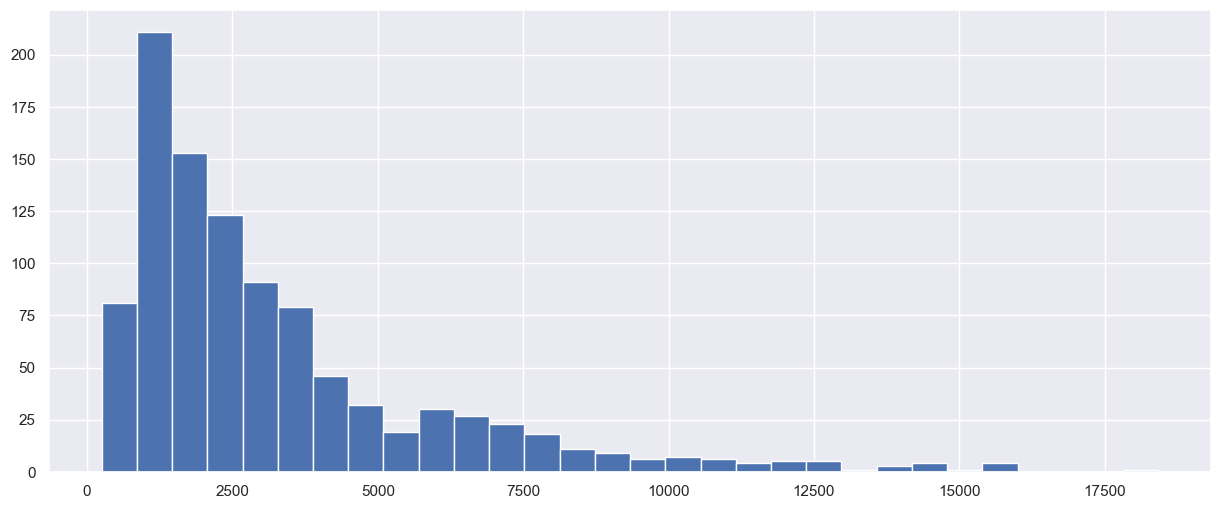

In [26]:
plt.hist(x='amount',bins=30,data=data)

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

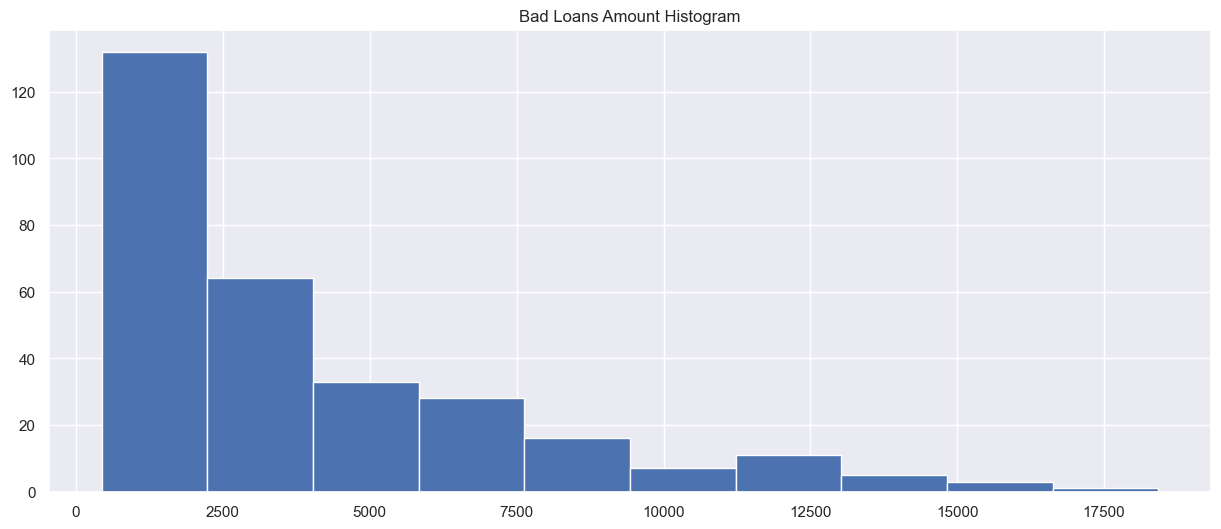

In [27]:
plt.hist(data=data[data['credit_risk']==0],x='amount')
plt.title('Bad Loans Amount Histogram')

In [28]:
max(data[data['credit_risk']==0]['amount'])


18424

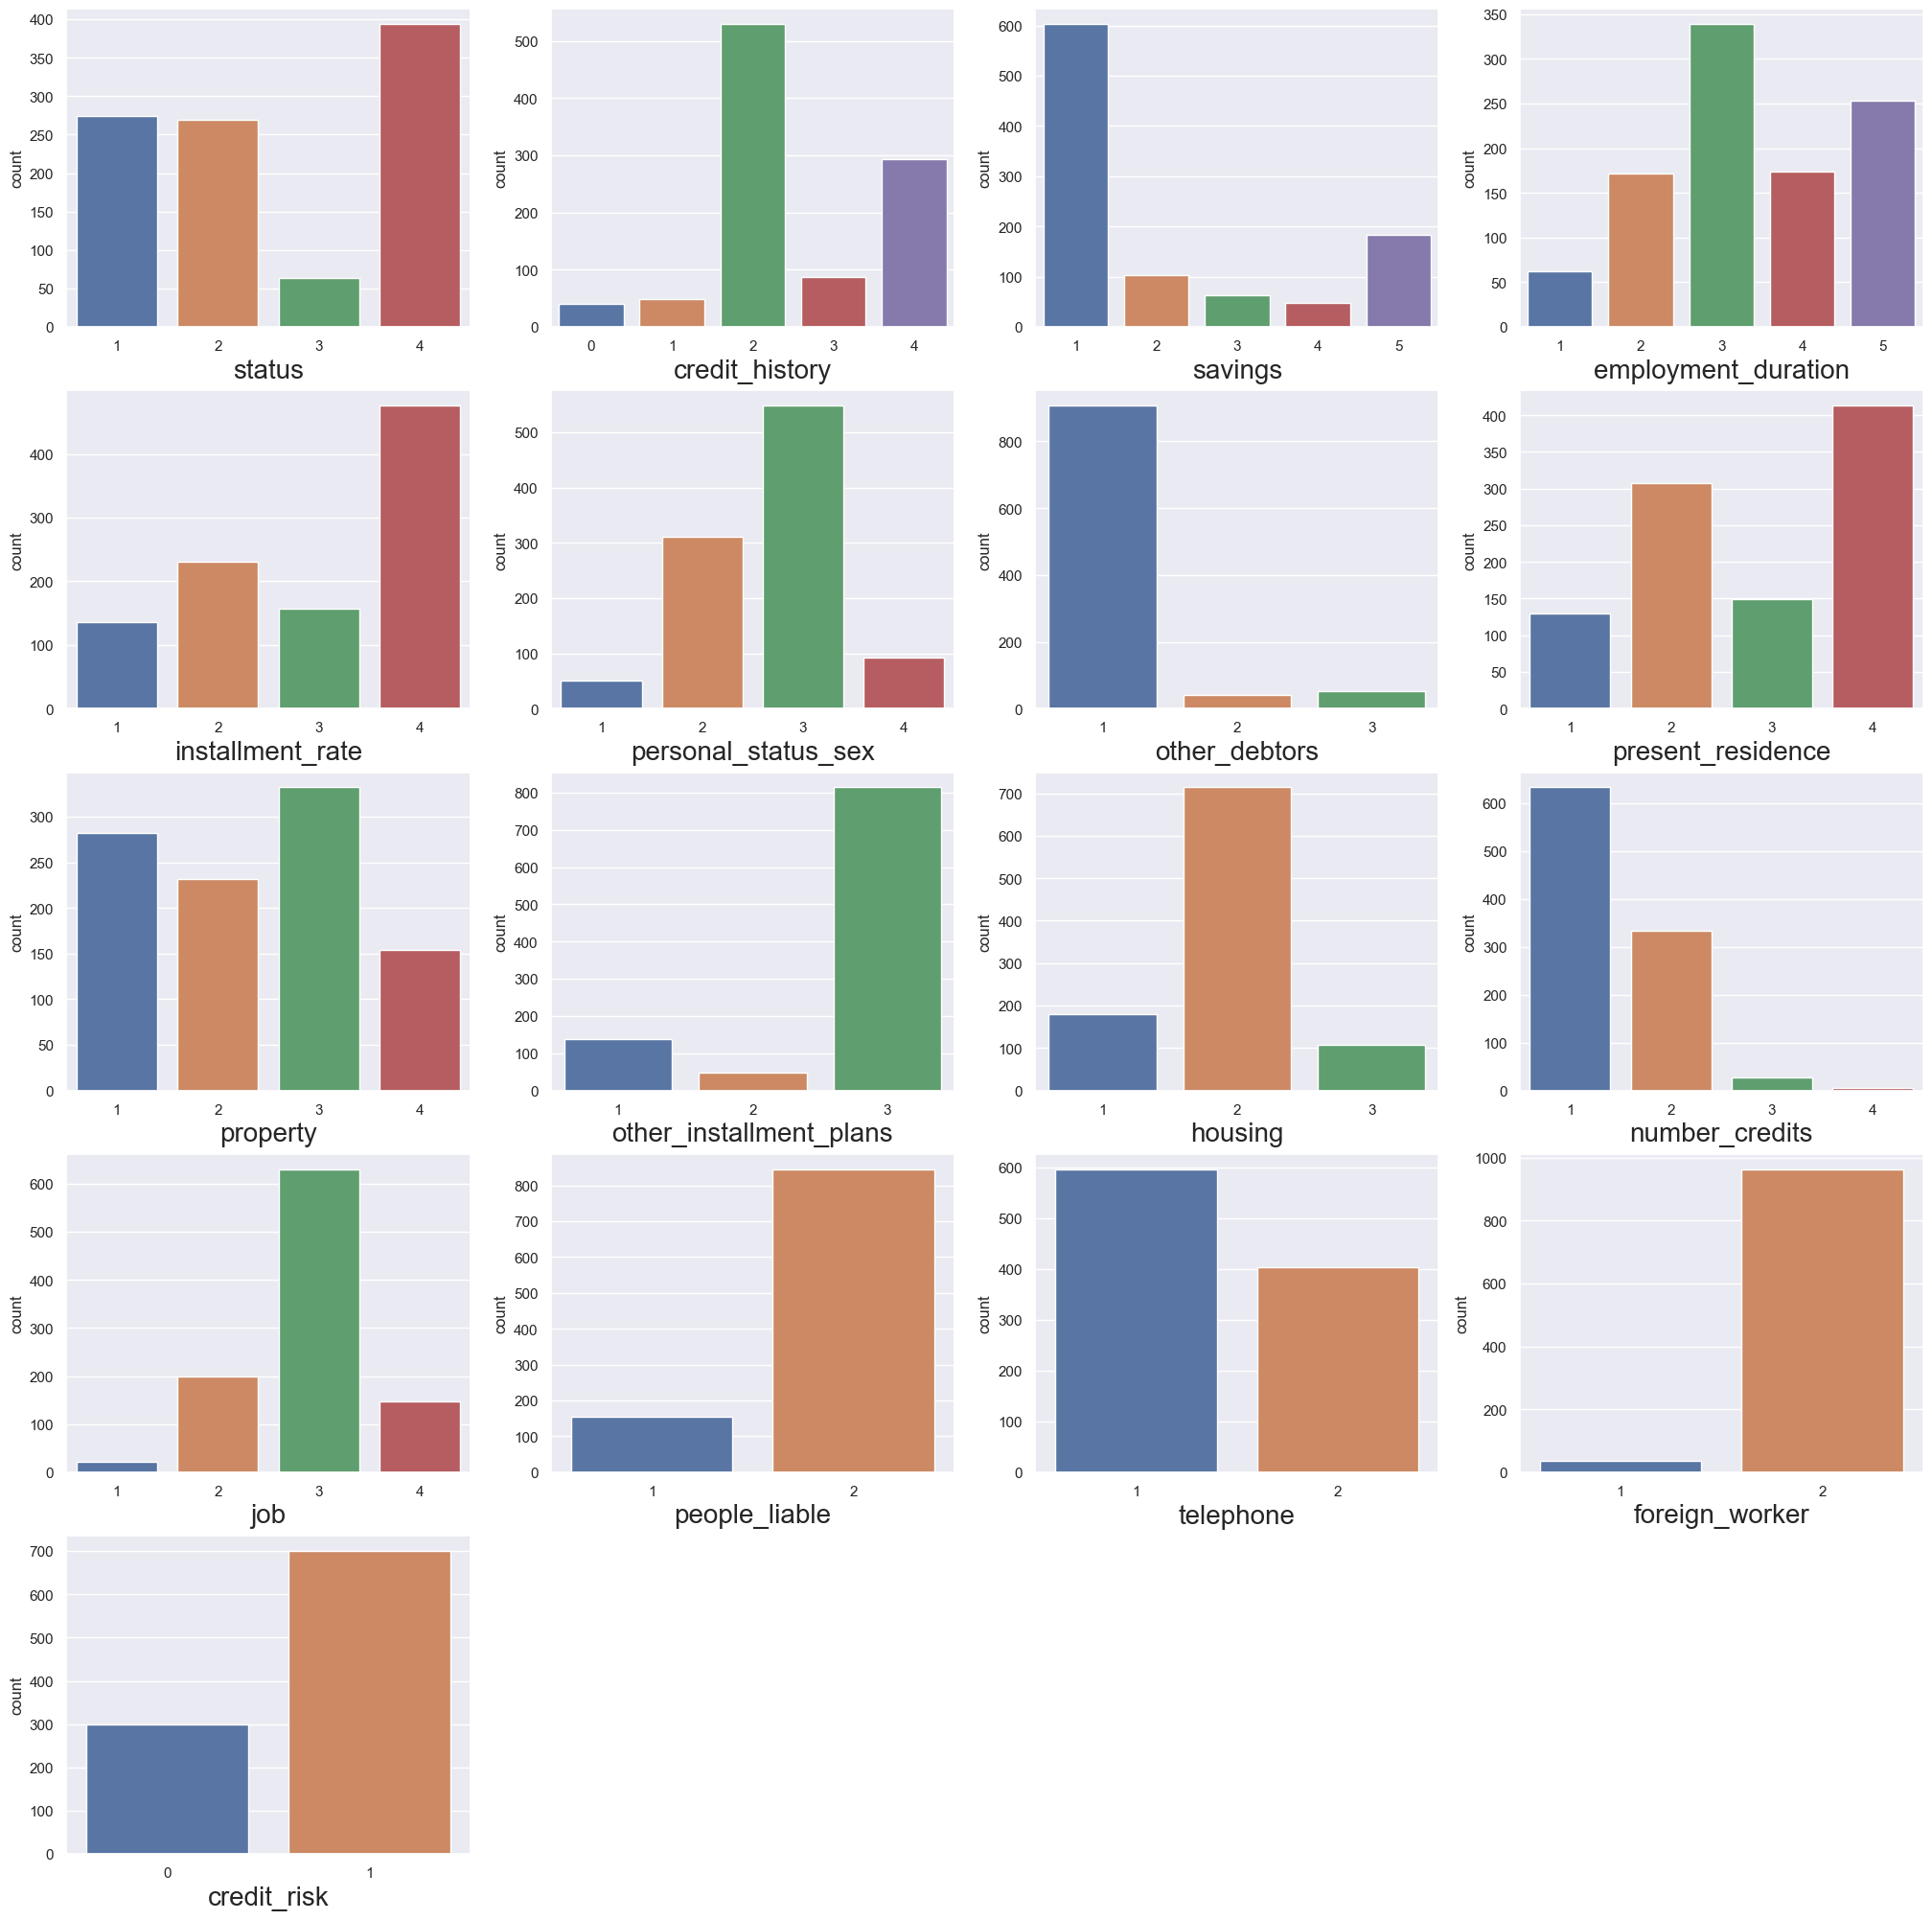

In [29]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

for i in discrete_variable:
    # There Are 17 Feature In Discrete Variable
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=data[discrete_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

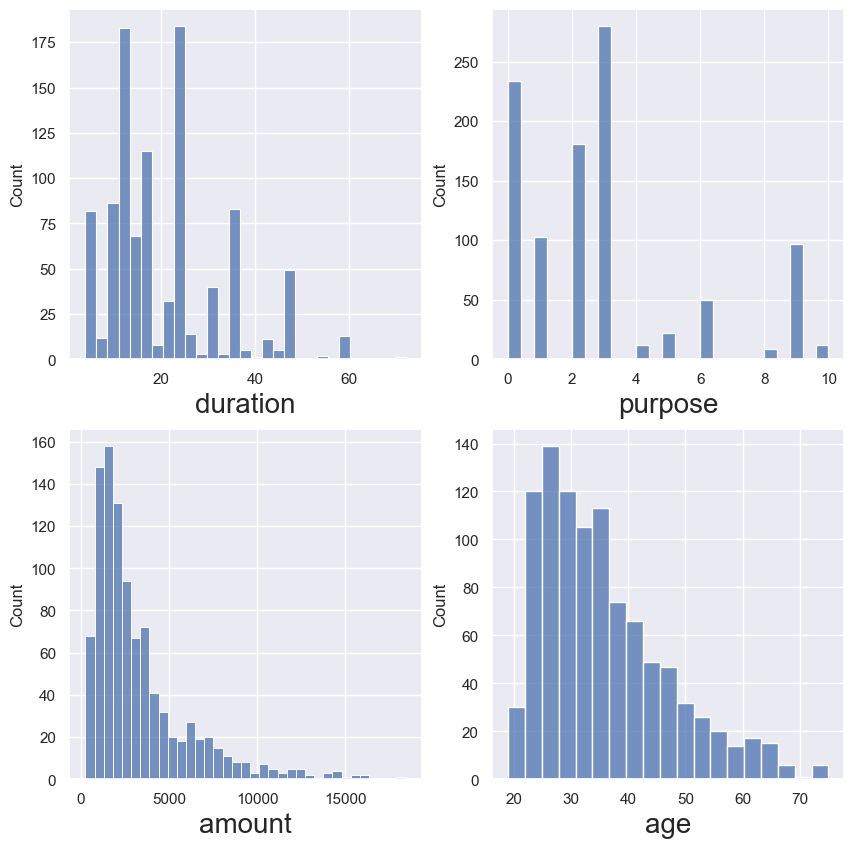

In [30]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in continous_variable:
    # There Are 4 Feature In Continous Variable
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=data[continous_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

In [31]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

In [32]:
((data < (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()


status                       0
duration                    70
credit_history               0
purpose                    118
amount                      72
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors               93
present_residence            0
property                     0
age                         23
other_installment_plans    186
housing                    286
number_credits               6
job                        370
people_liable              155
telephone                    0
foreign_worker              37
credit_risk                  0
dtype: int64

In [33]:
columns=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']

In [34]:
for i in columns:
    q75,q25=np.percentile(data[i],[75,25])
    iqr=q75 - q25
    minimum = q25 - 1.5*iqr
    maximum = q75 + 1.5*iqr
    data.loc[data[i] < minimum, i] = minimum
    data.loc[data[i] > maximum, i] = maximum

In [35]:
((data < (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [36]:
data.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                     1.028761
savings                    1.016677
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             1.098240
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

In [37]:
col=['amount','savings','number_credits']
for i in col:
    data[i]=np.log(data[i]+1)

In [38]:
data.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                    -0.092265
savings                    0.832475
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.824755
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

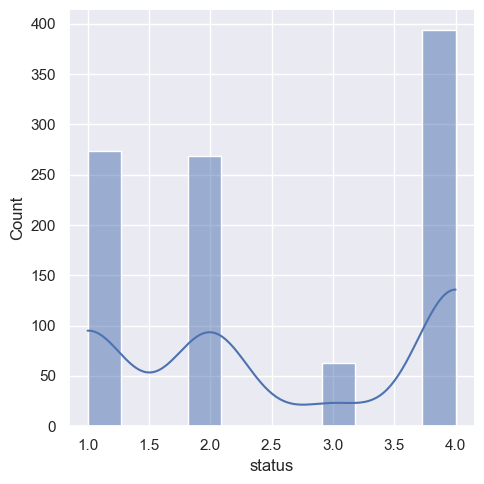

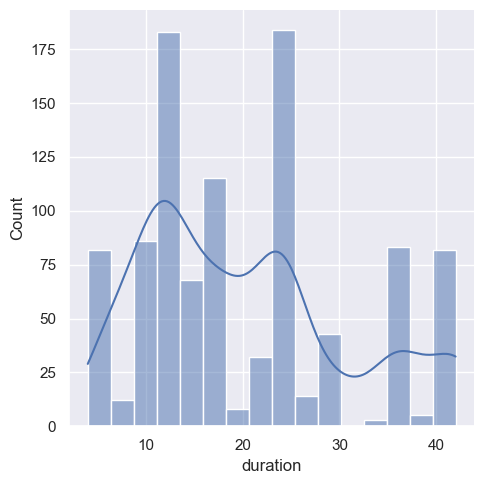

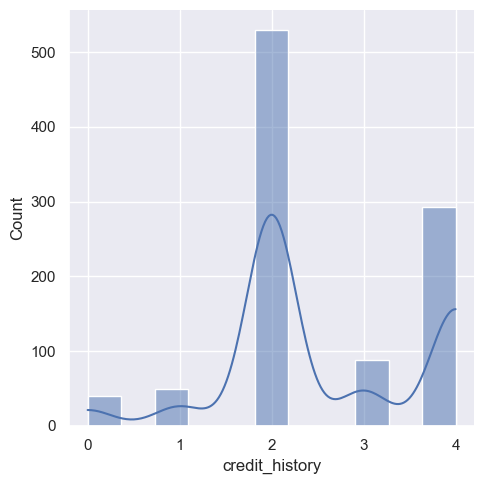

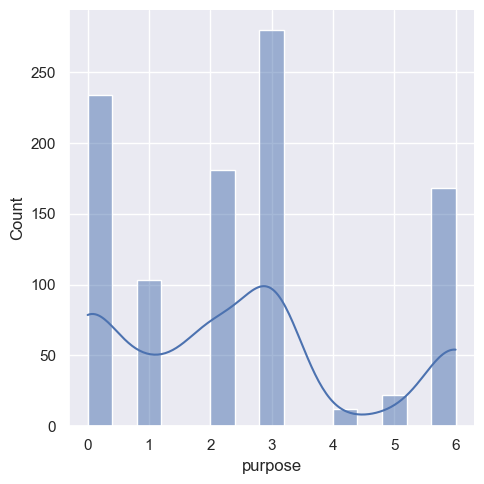

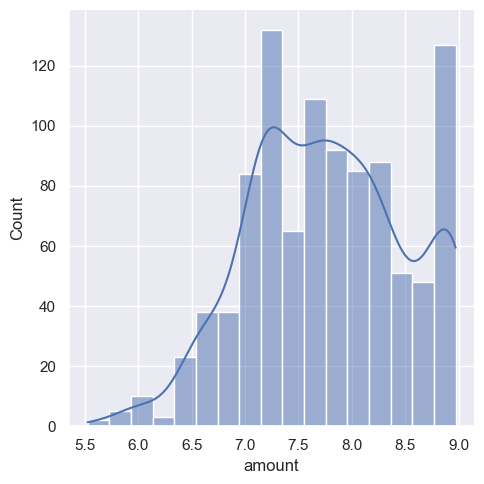

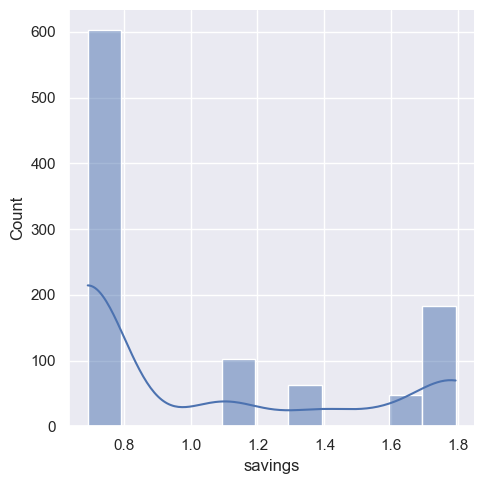

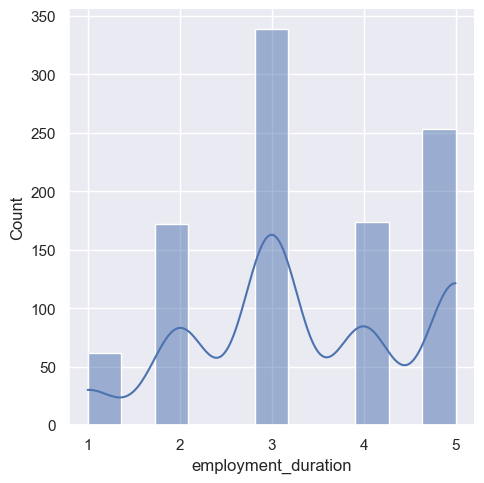

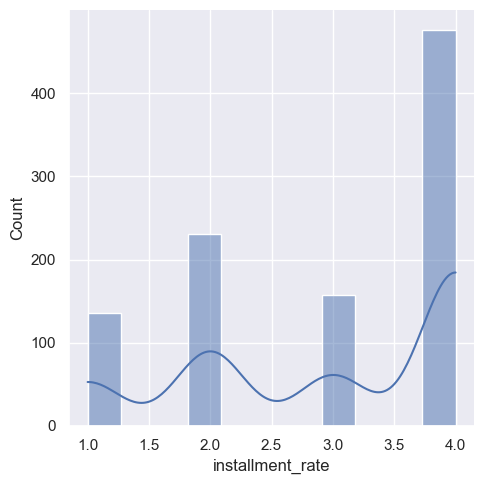

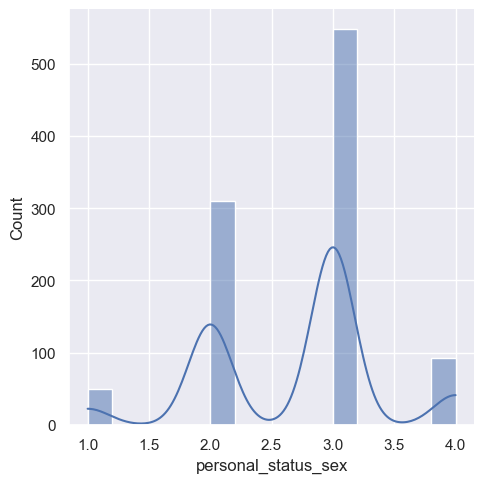

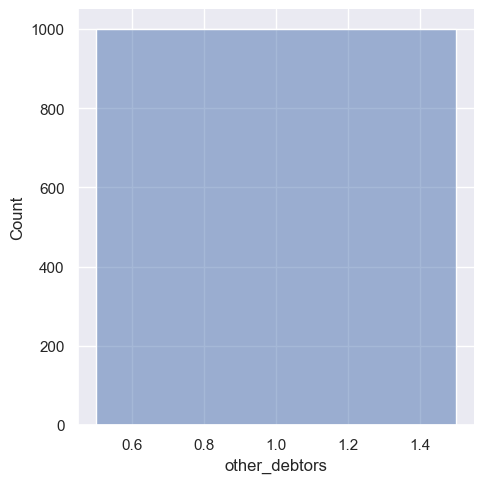

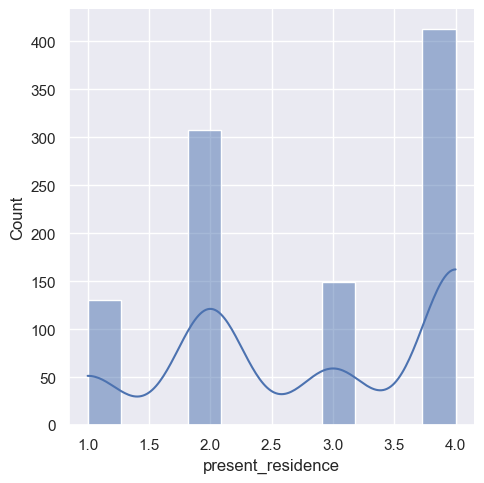

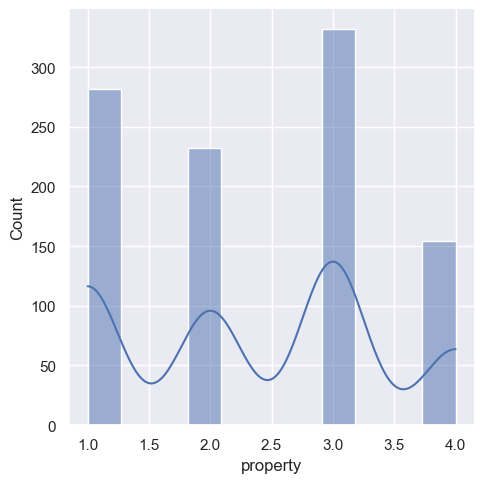

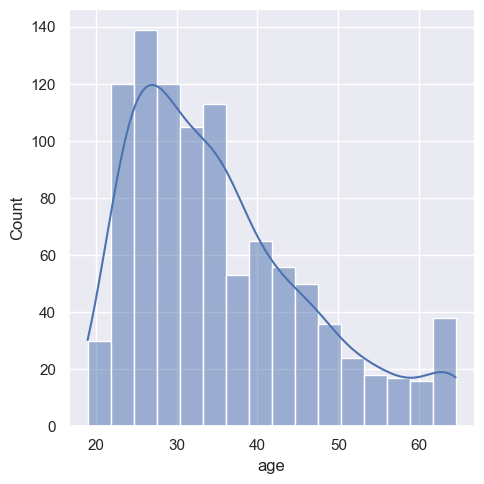

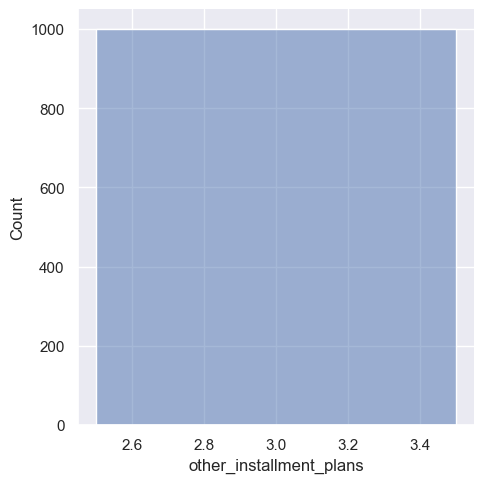

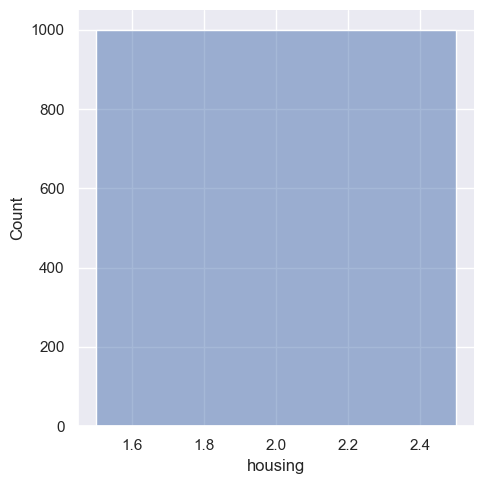

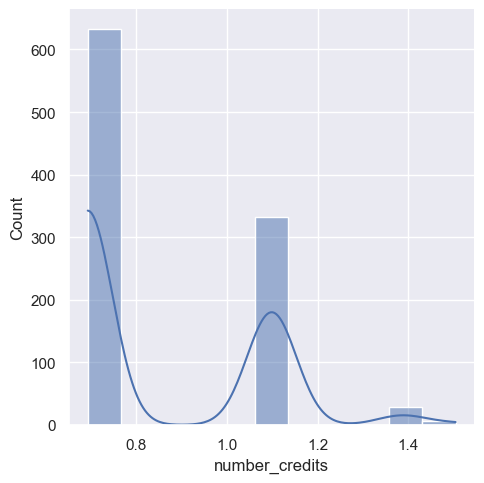

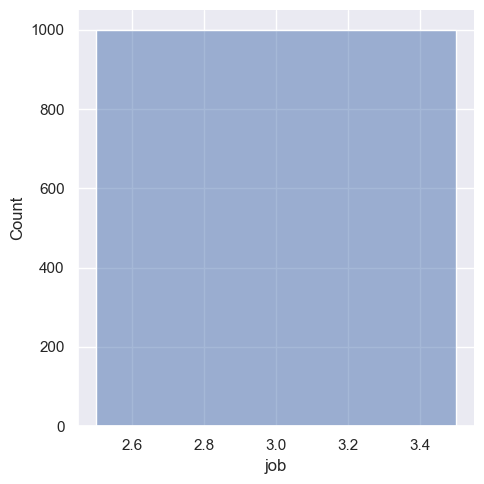

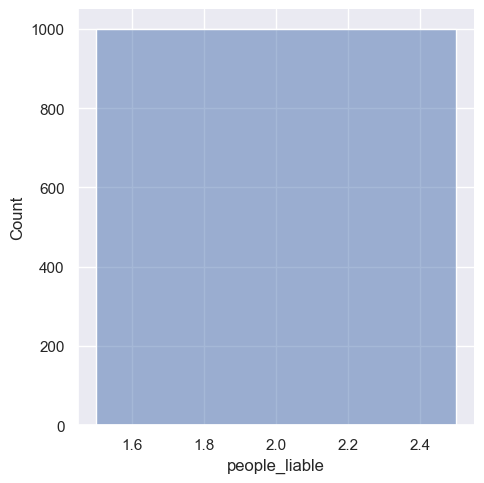

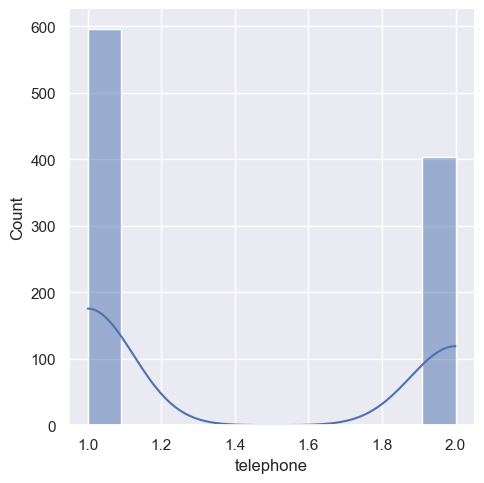

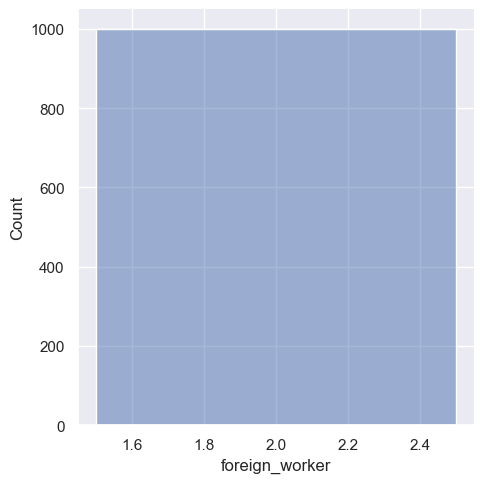

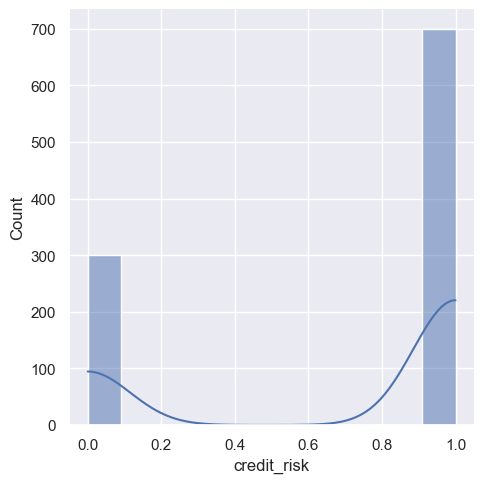

In [39]:
for i in data.columns:
    sns.displot(data=data,x=i,kde=True)

In [40]:
data.drop(["other_debtors","other_installment_plans","housing","job","people_liable","foreign_worker"],axis=1,inplace=True)

In [41]:
data.shape

(1000, 15)

In [42]:
data.to_csv("final_data.csv")